Initalization date of IFS forecast: 2024-08-15
Flight date: 2024-08-15
Flight index: KA-20240815a


/opt/miniconda3/envs/orcestra_book/lib/python3.12/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/opt/miniconda3/envs/orcestra_book/lib/python3.12/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/opt/miniconda3/envs/orcestra_book/lib/python3.12/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)


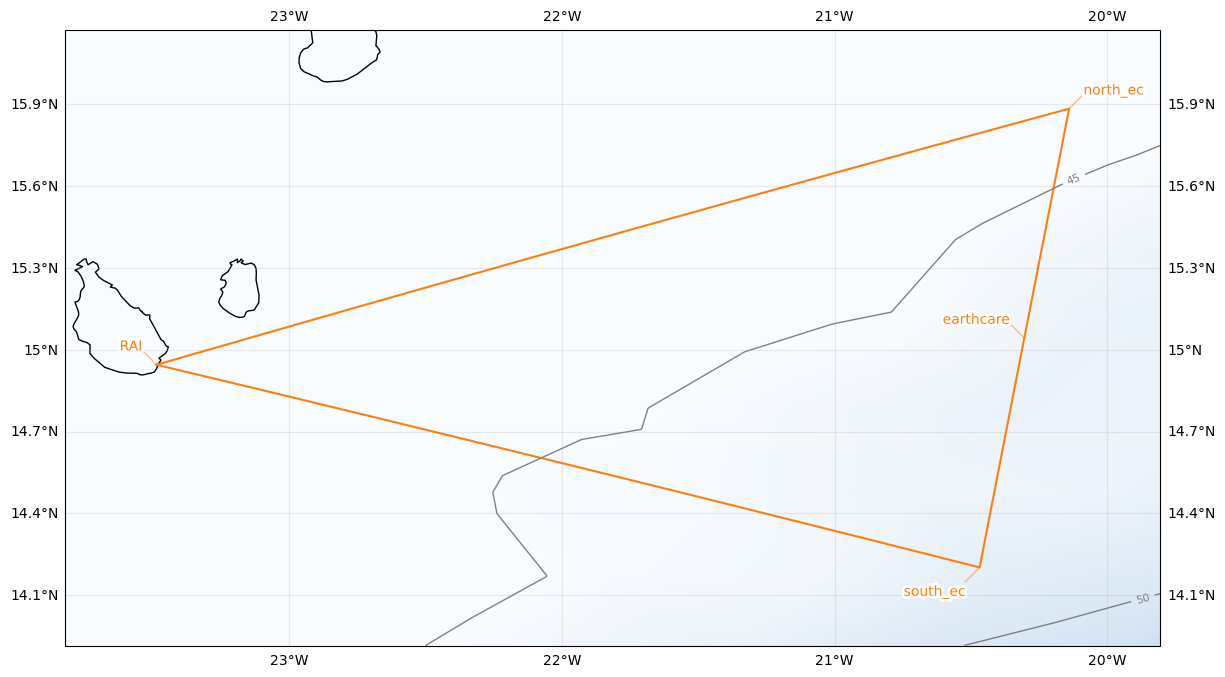

In [1]:
from orcestra.flightplan import sal, bco, LatLon, IntoCircle, path_preview, plot_cwv
from datetime import datetime
import intake
import easygems.healpix as egh

cat = intake.open_catalog("https://tcodata.mpimet.mpg.de/internal.yaml")

# Define dates for forecast initialization and flight

issued_time = datetime(2024, 8, 15, 0, 0, 0)
issued_time_str = issued_time.strftime('%Y-%m-%d')

flight_time = datetime(2024, 8, 15, 12, 0, 0)
flight_time_str = flight_time.strftime('%Y-%m-%d')
flight_index = f"KA-{flight_time.strftime('%Y%m%d')}a"

print("Initalization date of IFS forecast: " + issued_time_str + "\nFlight date: " + flight_time_str + "\nFlight index: " + flight_index)

airport = LatLon(lat=14.945, lon=-23.4863889, label='RAI')
north_ec = LatLon(lat=15.884118, lon=-20.139438, label='north_ec')
earthcare = LatLon(lat=15.042972, lon=-20.30403, label='earthcare')
south_ec = LatLon(lat=14.201713, lon=-20.467758, label='south_ec')

leg_out = [
     airport,
     south_ec
]

leg_calval = [
     south_ec,
     earthcare,
     north_ec
]

leg_home = [
     north_ec,
     airport
]

path = leg_out + leg_calval + leg_home 

cat = intake.open_catalog("https://tcodata.mpimet.mpg.de/internal.yaml")
ds = cat.HIFS(datetime=issued_time).to_dask().pipe(egh.attach_coords)
cwv_flight_time = ds["tcwv"].sel(time=flight_time, method = "nearest")

ax = path_preview(path)
plot_cwv(cwv_flight_time)



In [2]:
import pandas as pd
from dataclasses import asdict

pd.DataFrame.from_records(map(asdict, [south_ec, earthcare, north_ec])).set_index("label")

,lat,lon,fl,time,note
label,,,,,
south_ec,14.201713,-20.467758,None,None,None
earthcare,15.042972,-20.304030,None,None,None
north_ec,15.884118,-20.139438,None,None,None
